In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
try:
  import ktrain
except:
  !pip install ktrain
  os.kill(os.getpid(), 9)
import ktrain
import pandas as pd
import numpy as np



In [ ]:
reviews = pd.read_json("drive/MyDrive/news_category_trainingdata.json")


In [ ]:
reviews.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
print(reviews.info())
print(reviews.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 10.7+ MB
None
category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64


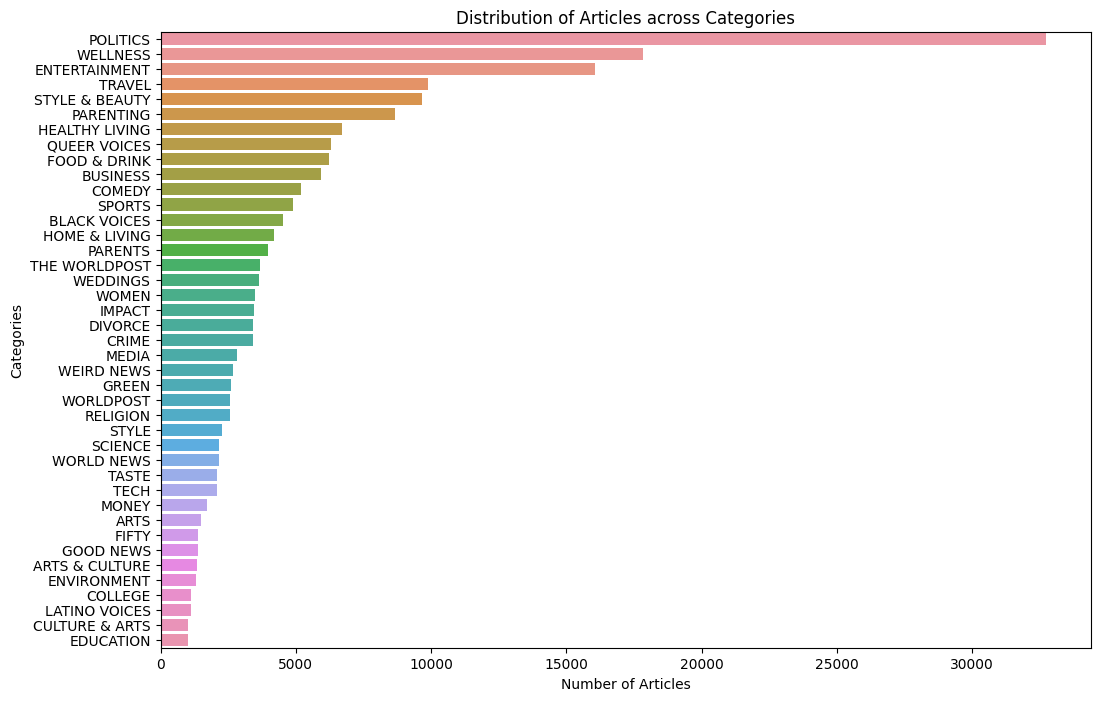

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of articles in each category
category_counts = reviews['category'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts, y=category_counts.index)
plt.xlabel('Number of Articles')
plt.ylabel('Categories')
plt.title('Distribution of Articles across Categories')
plt.show()


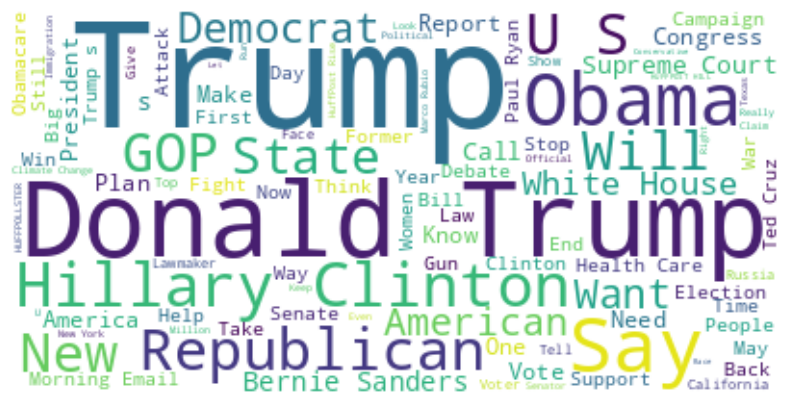

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all headlines into a single string
politics_headlines = reviews[reviews['category'] == 'POLITICS']['headline']

# Join all headlines in the 'politics' category into a single string
politics_text = ' '.join(politics_headlines)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(politics_text)

# Display the generated WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


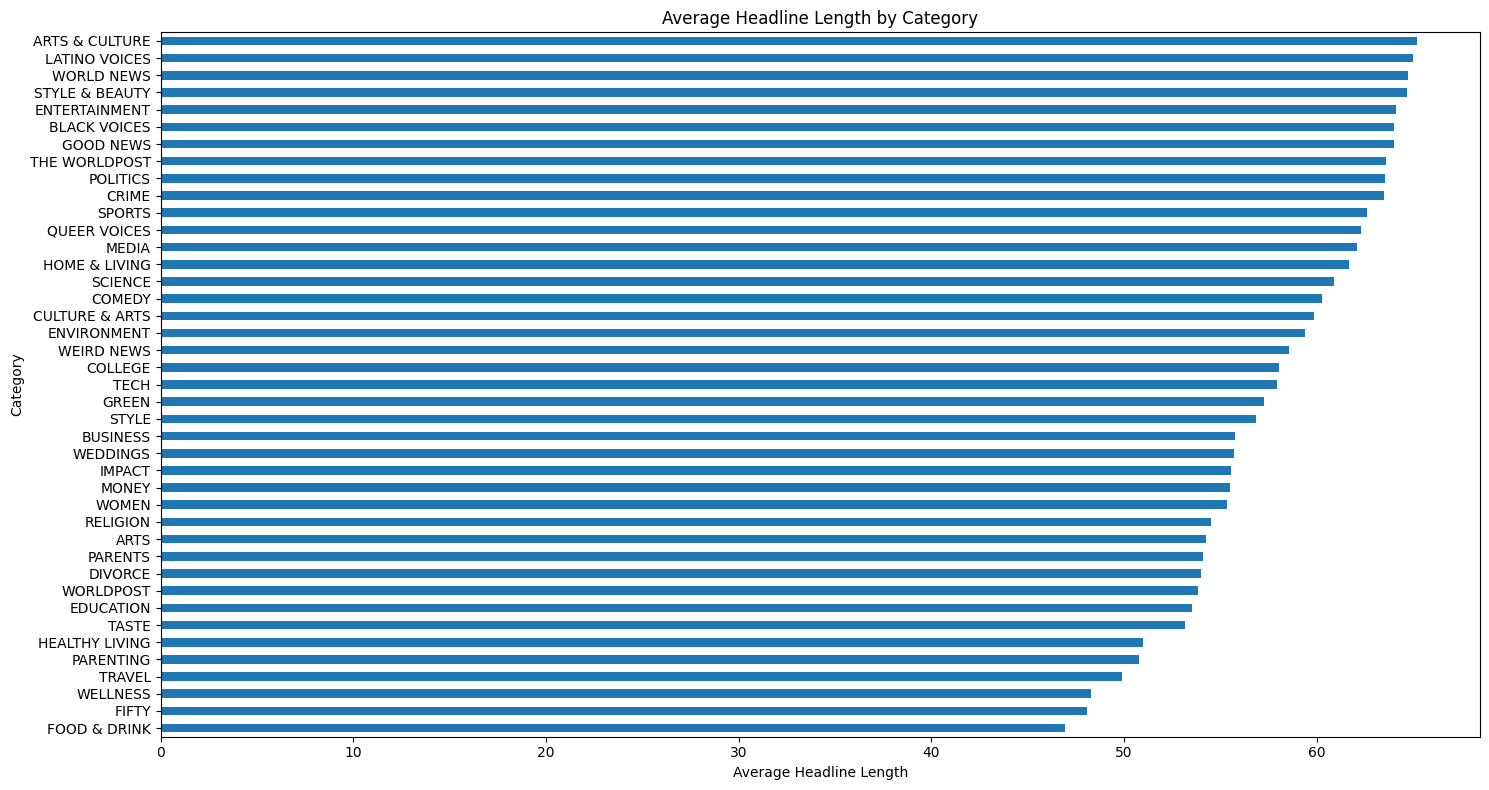

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the length of each headline
reviews['headline_length'] = reviews['headline'].apply(len)

# Group by category and describe headline lengths
category_headline_length_stats = reviews.groupby('category')['headline_length'].describe()

# Plotting the average headline length for each category
plt.figure(figsize=(15, 8))
category_headline_length_stats['mean'].sort_values().plot(kind='barh')
plt.xlabel('Average Headline Length')
plt.ylabel('Category')
plt.title('Average Headline Length by Category')
plt.tight_layout()
plt.show()



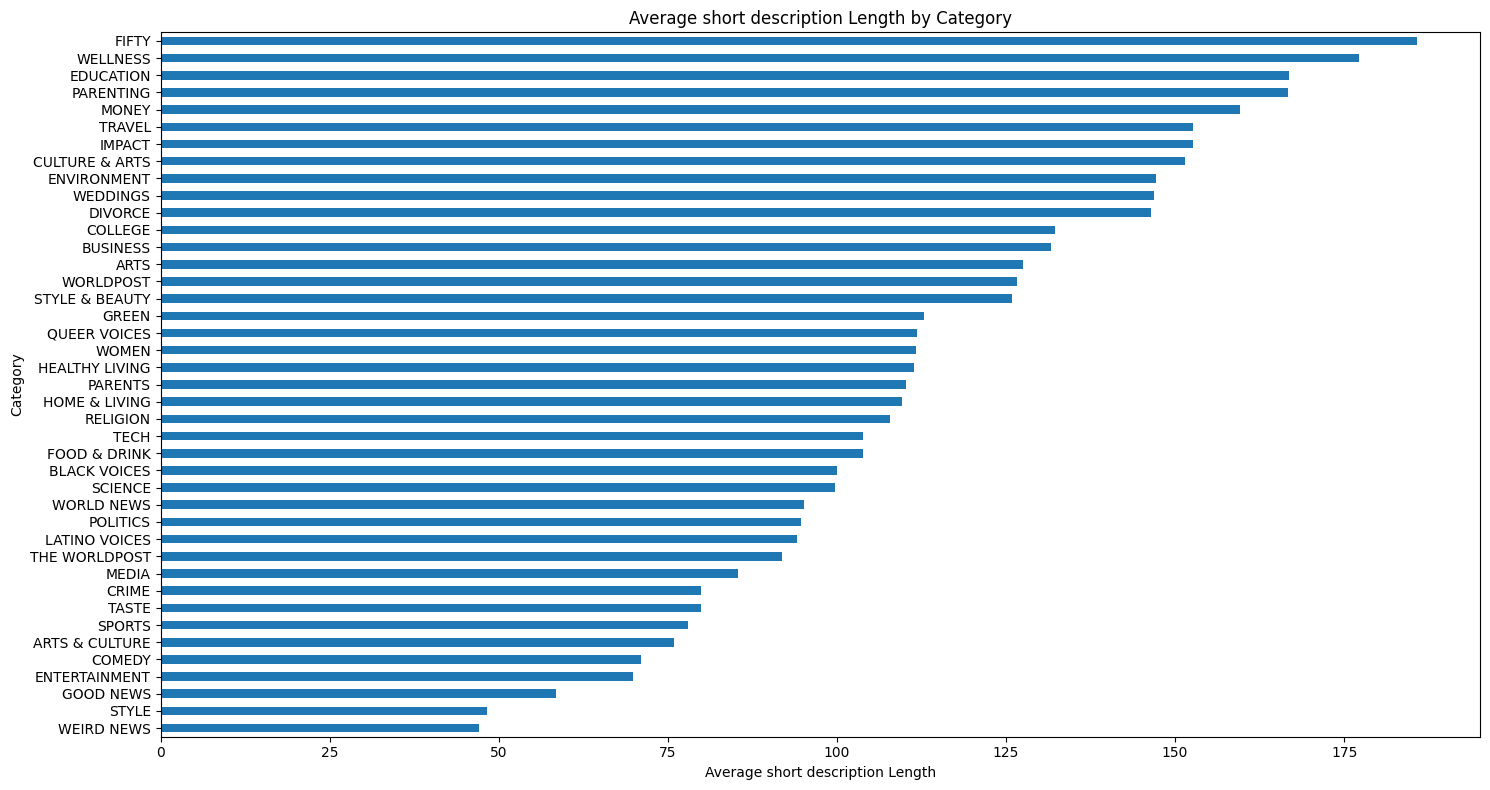

In [ ]:
# Calculate the length of each headline
reviews['short_description_length'] = reviews['short_description'].apply(len)

# Group by category and describe headline lengths
category_short_description_length_stats = reviews.groupby('category')['short_description_length'].describe()

# Plotting the average headline length for each category
plt.figure(figsize=(15, 8))
category_short_description_length_stats['mean'].sort_values().plot(kind='barh')
plt.xlabel('Average short description Length')
plt.ylabel('Category')
plt.title('Average short description Length by Category')
plt.tight_layout()
plt.show()

